
# Place the Data under the data/train and data/test folder respectively

# Data Folder is structed as follows

# Preprocessed data is placed under data/preprocessed

# Predicitons as placed under the data/predictions


# Importing all the Libraries

In [75]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator


import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

# Starting the H2O 

In [76]:
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,23 hours 26 mins
H2O cluster version:,3.16.0.3
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_Avinash_Bendigeri_xg04ex
H2O cluster total nodes:,1
H2O cluster free memory:,5.547 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


# Reading the Train Datasets and Assigning them Indivually


In [77]:
train_base_df = pd.read_csv("data/train/Train.csv",na_values=['?'])
train_claim_df = pd.read_csv("data/train/Train_Claim.csv",na_values=['?',"MISSEDDATA","MISSINGVALUE",-5])
train_demographics_df = pd.read_csv("data/train/Train_Demographics.csv",na_values=['?','NA',' '])
train_policy_df = pd.read_csv("data/train/Train_Policy.csv",na_values=['?',"MISSINGVAL"])
train_vehicle_df = pd.read_csv("data/train/Train_Vehicle.csv",na_values=['???'])

# Reading the Test Datasets and Assigning them Indivually

In [78]:
test_base_df = pd.read_csv("data/test/Test.csv",na_values=['?'])
test_claim_df = pd.read_csv("data/test/Test_Claim.csv",na_values=['?',"MISSEDDATA","MISSINGVALUE",-5])
test_demographics_df = pd.read_csv("data/test/Test_Demographics.csv",na_values=['?','NA',' '])
test_policy_df = pd.read_csv("data/test/Test_Policy.csv",na_values=['?',"MISSINGVAL"])
test_vehicle_df = pd.read_csv("data/test/Test_Vehicle.csv",na_values=['???'])

# Merging the Train and Test 
## To fix the Levels Imbalance Problems

In [79]:
# Join and Merging all the Dataframes of the Train and the Test


# Merging the Dataframes for Claim, Demographics, Policy for train
train_temp_1 = pd.merge(train_base_df, train_claim_df, on='CustomerID', how='inner')
train_temp_2 = pd.merge(train_temp_1, train_demographics_df, on='CustomerID', how='inner')
train_temp_3 = pd.merge(train_temp_2,train_policy_df,on = 'CustomerID', how='inner')

# Merging the Dataframes for Claim, Demographics, Policy for test
test_temp_1 = pd.merge(test_base_df, test_claim_df, on='CustomerID', how='inner')
test_temp_2 = pd.merge(test_temp_1, test_demographics_df, on='CustomerID', how='inner')
test_temp_3 = pd.merge(test_temp_2,test_policy_df,on = 'CustomerID', how='inner')



# Splitting the Vehicle Dataframe into Vehicle_ID, Vehicle_Make, Vehicle_Model, Vehicle_YOM for Train

train_vehicle_id_df    =  train_vehicle_df[train_vehicle_df['VehicleAttribute'] == 'VehicleID']
train_vehicle_make_df  =  train_vehicle_df[train_vehicle_df['VehicleAttribute'] == 'VehicleMake']
train_vehicle_model_df =  train_vehicle_df[train_vehicle_df['VehicleAttribute'] == 'VehicleModel']
train_vehicle_yom_df   =  train_vehicle_df[train_vehicle_df['VehicleAttribute'] == 'VehicleYOM']

# Splitting the Vehicle Dataframe into Vehicle_ID, Vehicle_Make, Vehicle_Model, Vehicle_YOM for Test

test_vehicle_id_df =  test_vehicle_df[test_vehicle_df['VehicleAttribute'] == 'VehicleID']
test_vehicle_make_df =  test_vehicle_df[test_vehicle_df['VehicleAttribute'] == 'VehicleMake']
test_vehicle_model_df =  test_vehicle_df[test_vehicle_df['VehicleAttribute'] == 'VehicleModel']
test_vehicle_yom_df =  test_vehicle_df[test_vehicle_df['VehicleAttribute'] == 'VehicleYOM']




# Dropping the Vehicle Attribute for all the Vehicle Sub Dataframes
train_vehicle_id_df.drop(['VehicleAttribute'],inplace=True,axis=1)
train_vehicle_make_df.drop(['VehicleAttribute'],inplace=True,axis=1)
train_vehicle_model_df.drop(['VehicleAttribute'],inplace=True,axis=1)
train_vehicle_yom_df.drop(['VehicleAttribute'],inplace=True,axis=1)


# Assinging the columns to the specific Sub Vehicle Dataframes
train_vehicle_id_df.columns = ['CustomerID', 'VehicleID']
train_vehicle_make_df.columns = ['CustomerID', 'VehicleMake']
train_vehicle_model_df.columns = ['CustomerID', 'VehicleModel']
train_vehicle_yom_df.columns = ['CustomerID', 'VehicleYOM']


# Dropping the Vehicle Attribute for all the Vehicle Sub Dataframes
test_vehicle_id_df.drop(['VehicleAttribute'],inplace=True,axis=1)
test_vehicle_make_df.drop(['VehicleAttribute'],inplace=True,axis=1)
test_vehicle_model_df.drop(['VehicleAttribute'],inplace=True,axis=1)
test_vehicle_yom_df.drop(['VehicleAttribute'],inplace=True,axis=1)


# Assinging the columns to the specific Sub Vehicle Dataframes
test_vehicle_id_df.columns = ['CustomerID', 'VehicleID']
test_vehicle_make_df.columns = ['CustomerID', 'VehicleMake']
test_vehicle_model_df.columns = ['CustomerID', 'VehicleModel']
test_vehicle_yom_df.columns = ['CustomerID', 'VehicleYOM']




# Merging train_temp_3 with train_vehicle Subdatasets
train_temp_4 = pd.merge(train_temp_3,train_vehicle_id_df,on = 'CustomerID', how='inner')
train_temp_5 = pd.merge(train_temp_4,train_vehicle_make_df,on = 'CustomerID', how='inner')
train_temp_6 = pd.merge(train_temp_5,train_vehicle_model_df,on = 'CustomerID', how='inner')
train_data = pd.merge(train_temp_6,train_vehicle_yom_df,on = 'CustomerID', how='inner')


# Merging test_temp_3 with test_vehicle Subdatasets
test_temp_4 = pd.merge(test_temp_3,test_vehicle_id_df,on = 'CustomerID', how='inner')
test_temp_5 = pd.merge(test_temp_4,test_vehicle_make_df,on = 'CustomerID', how='inner')
test_temp_6 = pd.merge(test_temp_5,test_vehicle_model_df,on = 'CustomerID', how='inner')
test_data = pd.merge(test_temp_6,test_vehicle_yom_df,on = 'CustomerID', how='inner')

C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\AVINASH_BENDIGERI\AppData\Lo

# Checking the Train and Test Data column counts

In [80]:
len(train_data.columns),len(test_data.columns)

(42, 41)

# Merging all the both train and test dataframes to form one single frame

In [81]:
target = "ReportedFraud"

target_value = train_data[target]


temp_train_data = train_data.drop('ReportedFraud',axis=1) 


temp_train_data['dataset'] = 'train'

temp_test_data = test_data.copy()

temp_test_data['dataset'] = 'test'


final_data = temp_train_data.append(temp_test_data)


# Function to calculate the percentage of the NA values present

In [82]:
def percentage_na(df,count):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent','mode_val'])
    print(missing_data.head(count))

In [83]:
percentage_na(final_data,15)

                       Total    Percent
PropertyDamage         13970  36.287599
PoliceReport           13067  33.942023
TypeOfCollission        6959  18.076264
VehicleMake               58   0.150657
AmountOfTotalClaim        58   0.150657
Witnesses                 58   0.150657
IncidentTime              38   0.098706
InsuredGender             38   0.098706
Country                    6   0.015585
NumberOfVehicles           0   0.000000
AmountOfInjuryClaim        0   0.000000
BodilyInjuries             0   0.000000
dataset                    0   0.000000
AmountOfVehicleDamage      0   0.000000
IncidentAddress            0   0.000000


# Listing the Categorical, Numerical and Date Variables

In [84]:
cat_variables = ['Policy_CombinedSingleLimit',
 'IncidentState',
 'Witnesses',
 'VehicleMake',
 'NumberOfVehicles',
 'AuthoritiesContacted',
 'IncidentCity',
 'InsuredRelationship',
 'SeverityOfIncident',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'IncidentTime',
 'InsurancePolicyState',
 'TypeOfCollission',
 'TypeOfIncident',
 'InsuredGender',
 'VehicleYOM',
 'IncidentAddress',
 'BodilyInjuries',
 'InsuredHobbies',
 'InsuredZipCode',
 'Policy_Deductible'
 ]


num_variables = [
    'AmountOfTotalClaim',
    'InsuredAge',
    'CapitalGains', 
    'CapitalLoss', 
    'CustomerLoyaltyPeriod',
    'PolicyAnnualPremium', 
    'UmbrellaLimit',
    'AmountOfInjuryClaim',
    'AmountOfPropertyClaim',
    'AmountOfVehicleDamage'         
]


date_variables = [
    'DateOfPolicyCoverage',
    'DateOfIncident'
]

# Converting the datatypes of category, float and Datetime


In [85]:


for var in cat_variables:
    final_data[var] = final_data[var].astype('category')

    
for var in num_variables:
    final_data[var] = final_data[var].astype('float')
    
    
for var in date_variables:
    final_data[var] =  pd.to_datetime(final_data[var], format='%Y-%m-%d')
    
    


# Creating a new feature RemainingDays by taking the difference of DateOfIncident & DateOfPolicyCoverage

In [86]:
import datetime as dt

final_data['RemainingDays'] = final_data['DateOfIncident'] - final_data['DateOfPolicyCoverage']
final_data['RemainingDays'] = final_data['RemainingDays'].astype(dt.timedelta).map(lambda x:x.days )


# Creating a new feature Financial Status by taking the adding of CapitalGains and CapitalLoss

In [87]:
final_data['FinancialStatus'] = final_data['CapitalGains'] + final_data['CapitalLoss']
final_data['FinancialStatus'] = final_data['FinancialStatus'].astype('float')


# Feature AmountOfTotalClaim by adding of AmountOfInjuryClaim + AmountOfPropertyClaim + AmountOfVehicleDamage

In [88]:
final_data['AmountOfTotalClaim'] = final_data['AmountOfInjuryClaim'] + final_data['AmountOfPropertyClaim'] + final_data['AmountOfVehicleDamage'] 

final_data['AmountOfTotalClaim'] = final_data['AmountOfTotalClaim'].astype('int')

# Transforming the Umbrealla Limit to Positive Number

In [89]:
final_data['UmbrellaLimit'] = final_data['UmbrellaLimit'].apply(lambda x: x if x > 0 else 0)

# Creating a new feature DistanceClaim by finding the difference of IncidentState  and InsurancePolicyState

In [90]:
def state_assignment(x):
    state_map = {'State1': 0 ,  'State2' : 1,  'State3':2,'State4' :3 , 'State5' :4,  'State6':5,  'State7':6, 'State8':7, 'State9':8}
    return(state_map[x])

final_data['IncidentState_Num'] = final_data['IncidentState'].apply(lambda x: state_assignment(x))
final_data['IncidentState_Num'] = final_data['IncidentState_Num'].astype('int')


final_data['InsurancePolicyState_Num'] = final_data['InsurancePolicyState'].apply(lambda x: state_assignment(x))
final_data['InsurancePolicyState_Num'] = final_data['InsurancePolicyState_Num'].astype('int')


final_data['DistanceClaim'] = np.absolute(final_data['InsurancePolicyState_Num'] - final_data['IncidentState_Num']  ) > 0
final_data['DistanceClaim'] = final_data['DistanceClaim'].astype('category')


# Convert the InsuredAge feature to Categorical with levels ( Youngster, MiddleAge, SeniorCitizen)

In [91]:
def convertInsuredAge(x):
    if x < 35:
        return 'Youngster'
    elif (x >= 35 and x < 55):
        return 'MiddleAge'
    else:
        return 'SeniorCitizen'
    
    
final_data['InsuredAgeGroup'] = final_data['InsuredAge'].apply(lambda x : convertInsuredAge(x))
final_data['InsuredAgeGroup'] = final_data['InsuredAgeGroup'].astype('category')

# Splitting the Final Merged Dataset to Train and Test

In [92]:
train_final_data = final_data[final_data['dataset'] =='train']

train_final_data.drop('dataset',axis=1,inplace=True)


test_final_data = final_data[final_data['dataset'] =='test']

test_final_data.drop('dataset',axis=1,inplace=True)


train_final_data[target] = target_value

C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# Function to delete the columns from the Dataframe


In [93]:


def drop_columns(df,cols):
    for col in cols:
        df.drop([col],inplace=True,axis=1) 
    

# Getting the Numerical and Categorical Variables

In [94]:
numerical_variables = list(train_final_data._get_numeric_data().columns)
catergorical_variables = list(set(train_final_data.columns) - set(numerical_variables))

catergorical_variables.remove(target)

# Visualization

In [95]:
temp_num_df = train_final_data[numerical_variables]

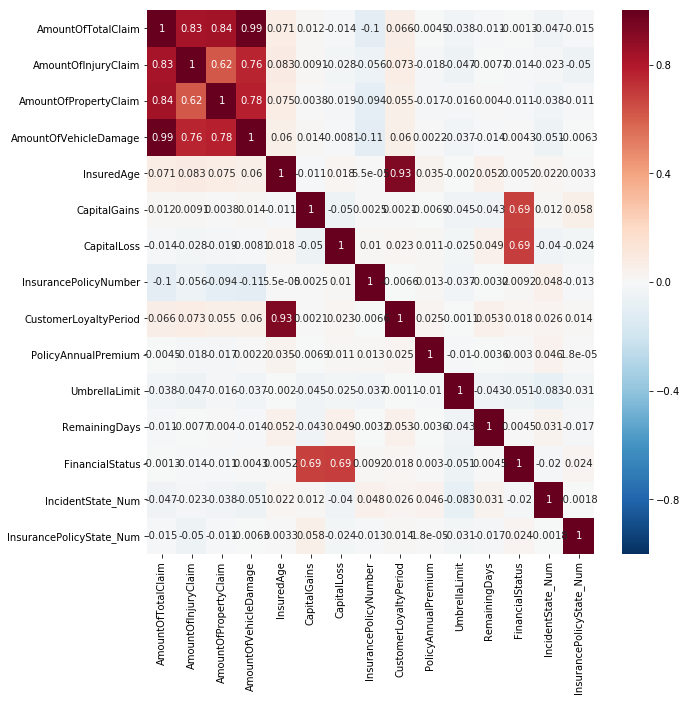

In [96]:
# Creating the Correlation Plots
plt.subplots(figsize=(10,10))
sns.heatmap(temp_num_df.corr(), annot=True,)

# Checking the Imbalance of the target variable

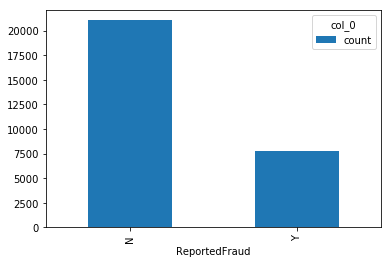

In [97]:
target_tab = pd.crosstab(index = train_final_data[target], columns="count")    
target_tab.plot.bar()
plt.show()

# Understanding the Distribution fo the Numerical Variable

For the var AmountOfTotalClaim
Skewness:  -0.782548
Kurtosis:  -0.299241 




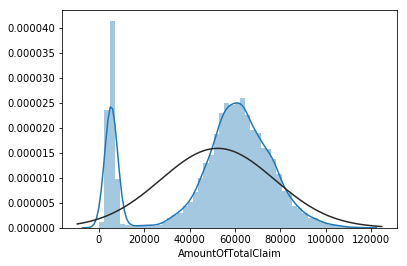

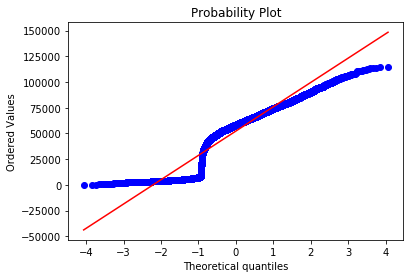

For the var AmountOfInjuryClaim
Skewness:  0.094468
Kurtosis:  -0.702579 




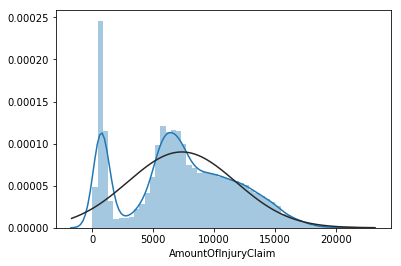

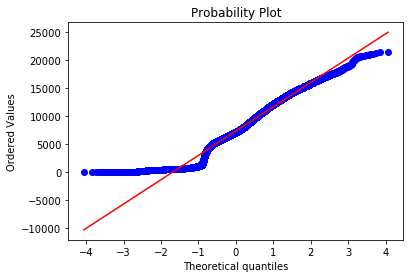

For the var AmountOfPropertyClaim
Skewness:  0.175570
Kurtosis:  -0.448387 




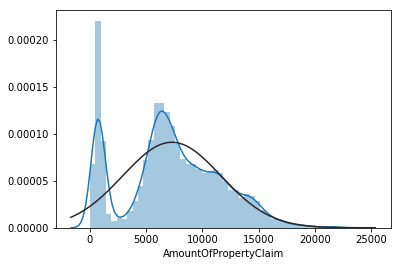

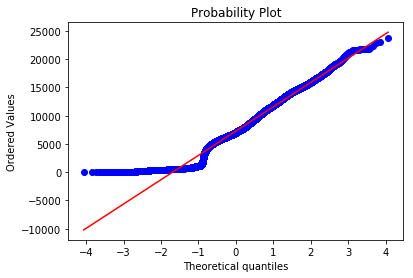

For the var AmountOfVehicleDamage
Skewness:  -0.819908
Kurtosis:  -0.286119 




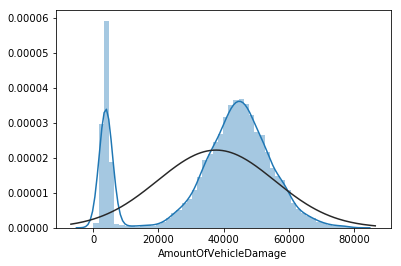

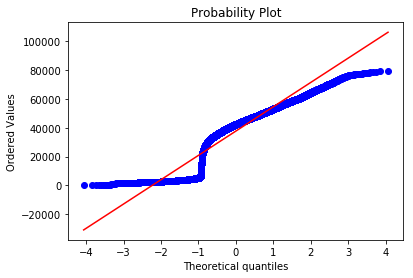

For the var InsuredAge
Skewness:  0.506413
Kurtosis:  -0.089284 




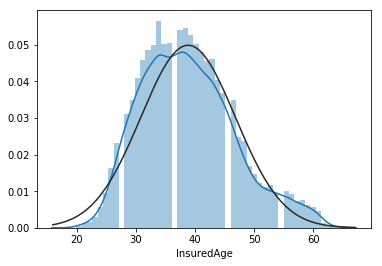

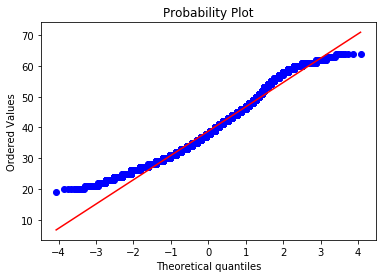

For the var CapitalGains
Skewness:  0.620799
Kurtosis:  -1.138880 




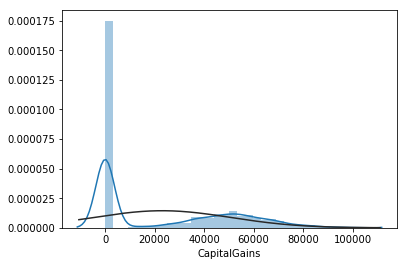

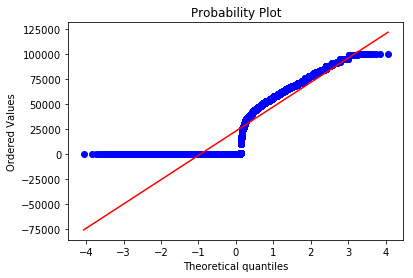

For the var CapitalLoss
Skewness:  -0.503664
Kurtosis:  -1.232711 




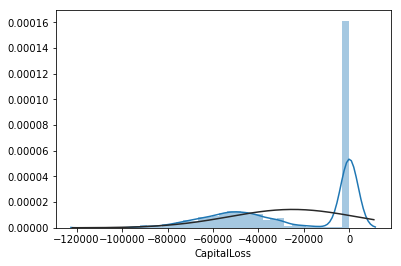

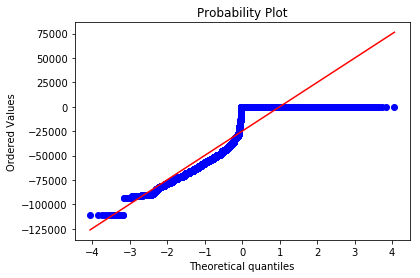

For the var InsurancePolicyNumber
Skewness:  0.008521
Kurtosis:  -1.197101 




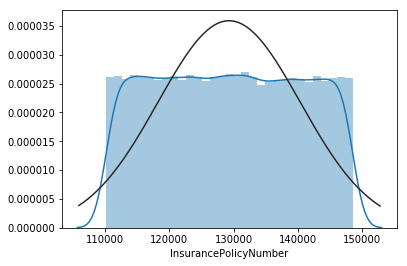

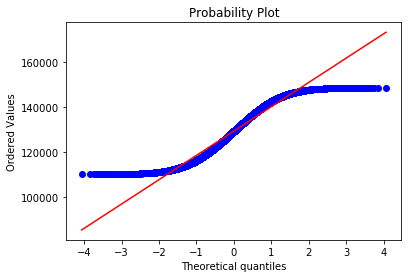

For the var CustomerLoyaltyPeriod
Skewness:  0.394522
Kurtosis:  -0.303061 




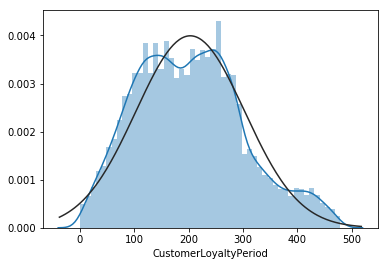

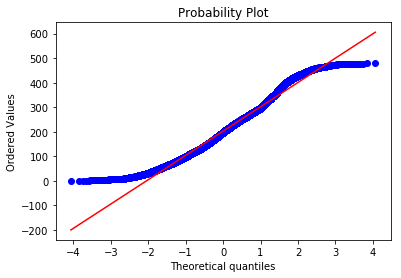

For the var PolicyAnnualPremium
Skewness:  -0.794961
Kurtosis:  4.169320 




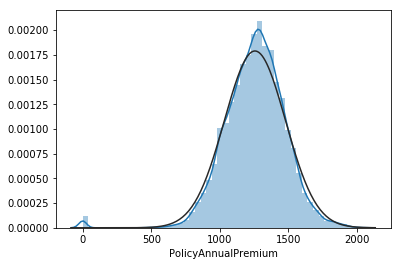

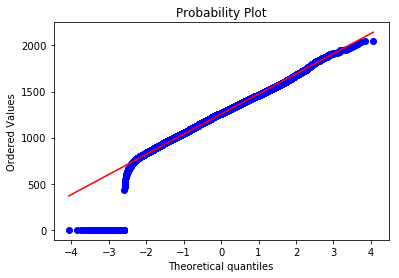

For the var UmbrellaLimit
Skewness:  1.925874
Kurtosis:  2.493735 




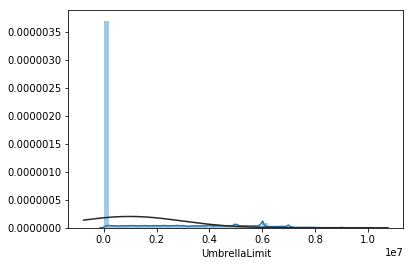

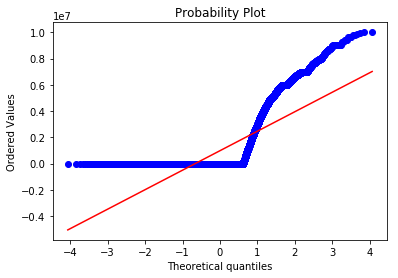

For the var RemainingDays
Skewness:  -0.047200
Kurtosis:  -1.097281 




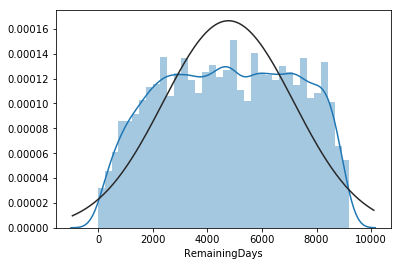

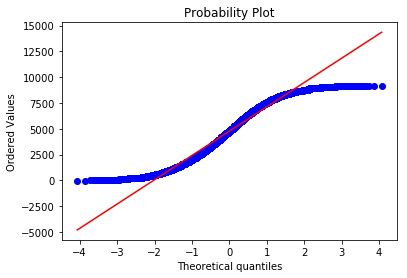

For the var FinancialStatus
Skewness:  0.067699
Kurtosis:  -0.512954 




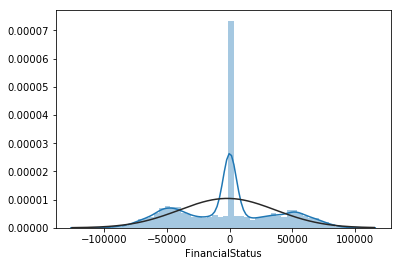

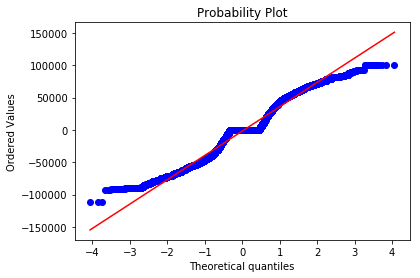

For the var IncidentState_Num
Skewness:  -0.058393
Kurtosis:  -1.260543 




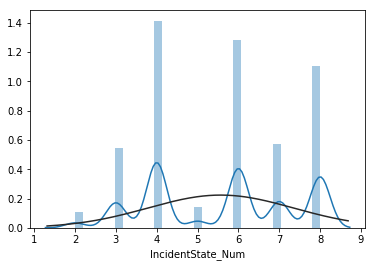

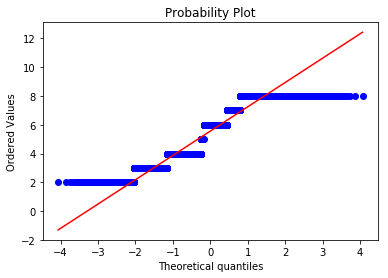

For the var InsurancePolicyState_Num
Skewness:  -0.027820
Kurtosis:  -1.547243 




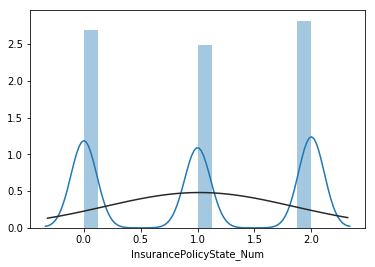

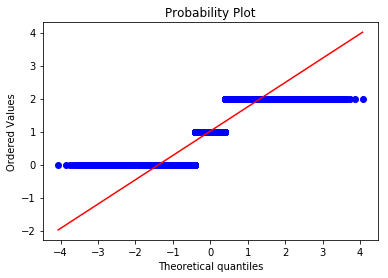

In [98]:
def get_skew_kurtosis(df):
    
        cols = df._get_numeric_data().columns
        for i in cols:
            try:
                print("For the var %s"%(i))
                print("Skewness:  %f" % df[i].skew())
                print("Kurtosis:  %f \n\n" % df[i].kurt())
                sns.distplot(df[i], fit=norm);
                fig = plt.figure()
                res = stats.probplot(df[i], plot=plt)
                plt.show()
            except:
                pass

get_skew_kurtosis(train_final_data)


# InsurancePolicyState Bar Plot

## State 3 where Policy were registered have maximum fraud

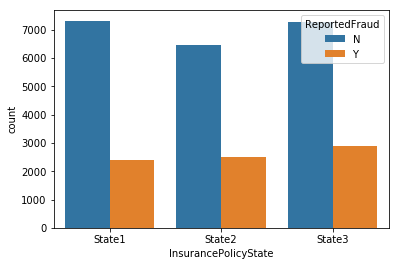

In [99]:
sns.countplot(x="InsurancePolicyState", hue=target, data=train_final_data)

# State 3 where Policy were registered have maximum fraud

# InsurancePolicyState Bar Plot

## State 7 where Incidents happen were registered have maximum fraud

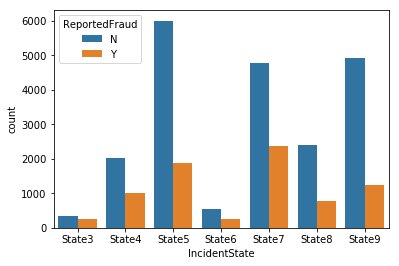

In [100]:
sns.countplot(x="IncidentState", hue=target, data=train_final_data)

# State 7 where Incidents happen were registered have maximum fraud

# SeverityOfIncident Bar Plot

## # Major Damage has the maximum fraud

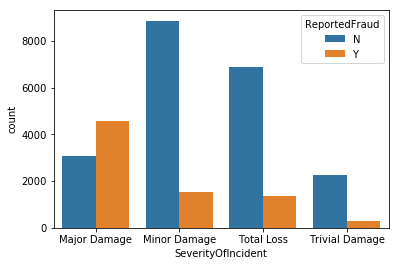

In [101]:
sns.countplot(x="SeverityOfIncident", hue=target, data=train_final_data)
# Major Damage has the maximum fraud

# NumberOfVehicles Bar Plot

## People with 3 Number of Vehicles have found to be making the Fraud considerable

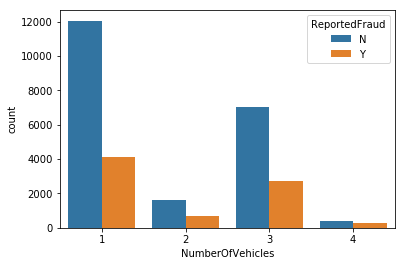

In [102]:
sns.countplot(x="NumberOfVehicles", hue=target, data=train_final_data)
# People with 3 Number of Vehicles have found to be making the Fraud considerable

# AuthoritiesContacted Bar Plot

## Shockingly after contacting Police Authorities we are seeing the Fraud 

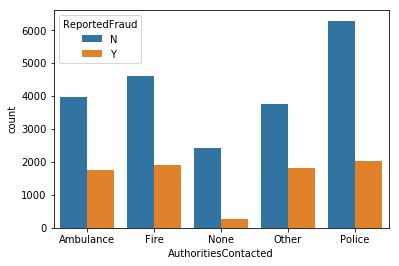

In [103]:
sns.countplot(x="AuthoritiesContacted", hue=target, data=train_final_data)
# Shockingly after contacting Police Authorities we are seeing the Fraud 

# Car with the Year of Make 1999, 2000 and 2007 are being involved in the Fraud

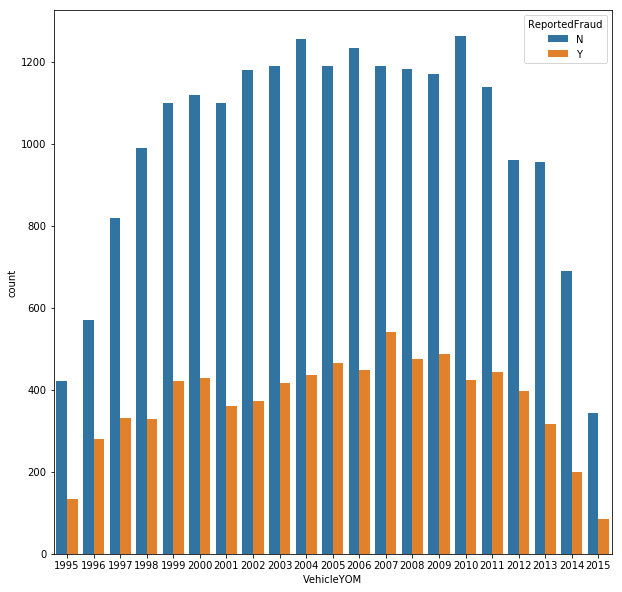

In [104]:

plt.subplots(figsize=(10,10))
sns.countplot(x="VehicleYOM", hue=target, data=train_final_data)



# Car with the Year of Make 1999, 2000 and 2007 are being involved in the Fraud

# Rear collision are more in number for Frauds 

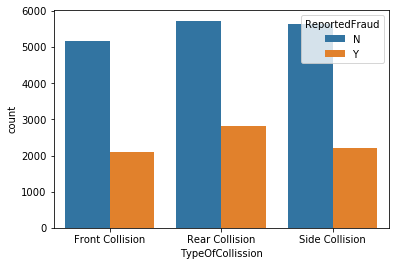

In [105]:
sns.countplot(x="TypeOfCollission", hue=target, data=train_final_data)

# Bodily Injuries 1 are more in Fraud

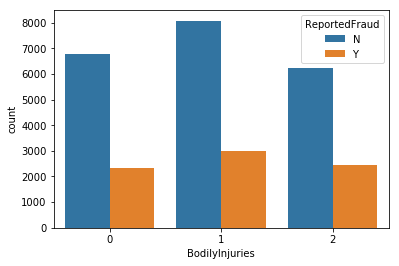

In [106]:
sns.countplot(x="BodilyInjuries", hue=target, data=train_final_data)



# JD and High School are more in Fraud

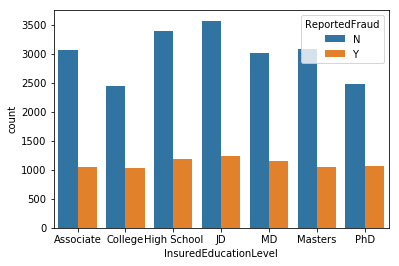

In [107]:
sns.countplot(x="InsuredEducationLevel", hue=target, data=train_final_data)



# BMW FORD and DODGE are involved in Frauds

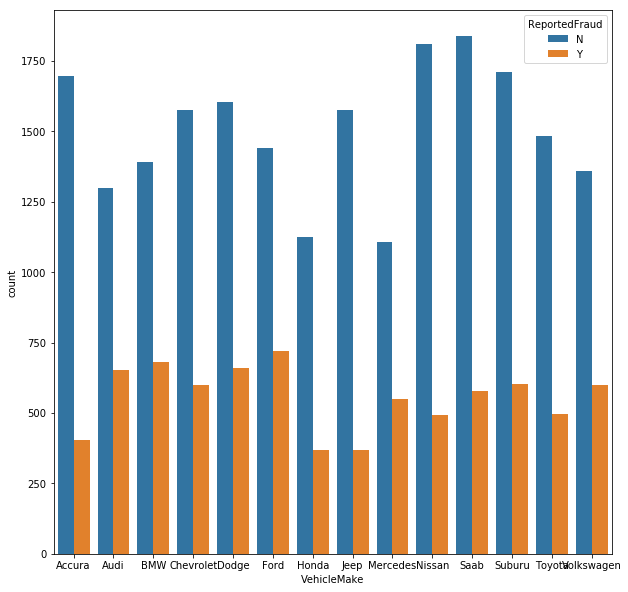

In [108]:

plt.subplots(figsize=(10,10))

sns.countplot(x="VehicleMake", hue=target, data=train_final_data)


# City 1 and City 2 are involved in the Fraud

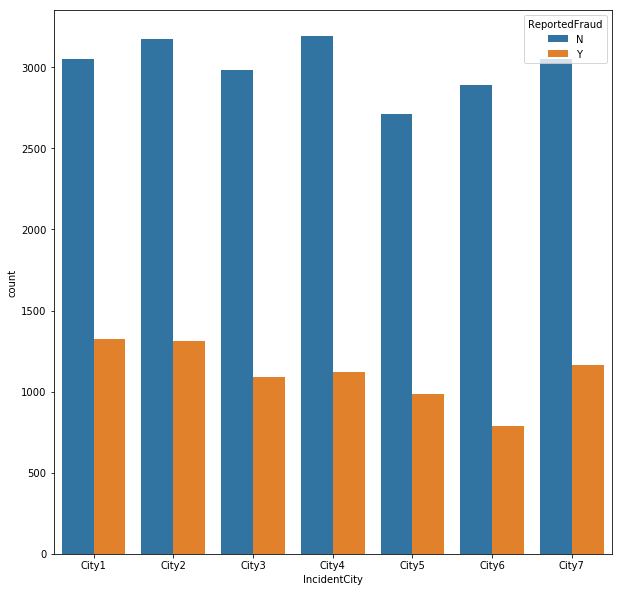

In [109]:
plt.subplots(figsize=(10,10))
sns.countplot(x="IncidentCity", hue=target, data=train_final_data)



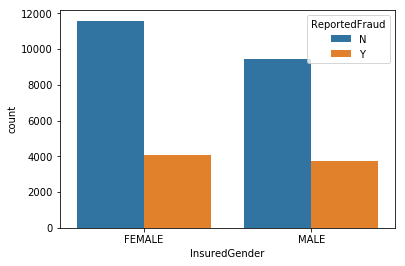

In [110]:
# plt.subplots(figsize=(10,10))
sns.countplot(x="InsuredGender", hue=target, data=train_final_data)

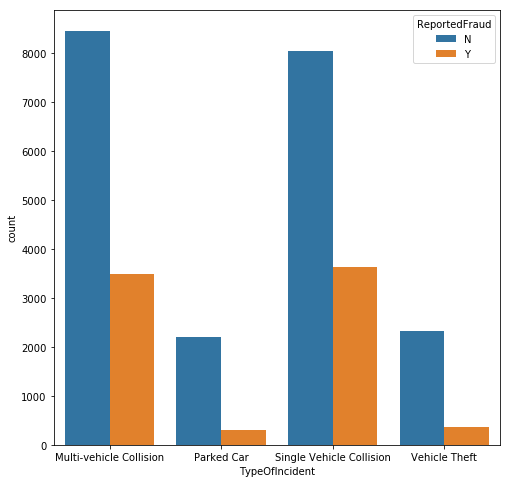

In [111]:
plt.subplots(figsize=(8,8))
sns.countplot(x="TypeOfIncident", hue=target, data=train_final_data)

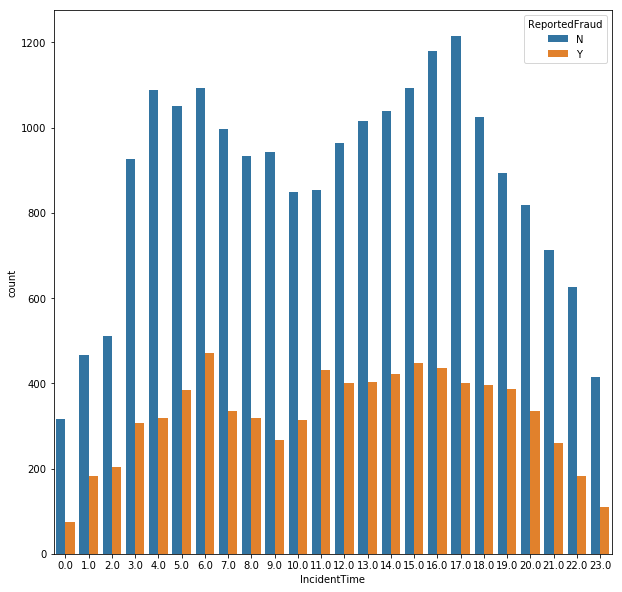

In [112]:
plt.subplots(figsize=(10,10))
sns.countplot(x="IncidentTime", hue=target, data=train_final_data)

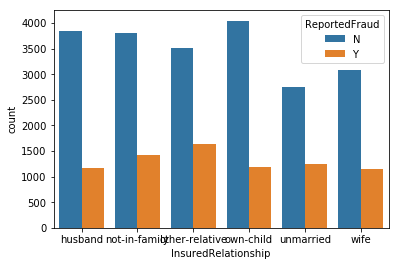

In [113]:
# plt.subplots(figsize=(10,10))
sns.countplot(x="InsuredRelationship", hue=target, data=train_final_data)

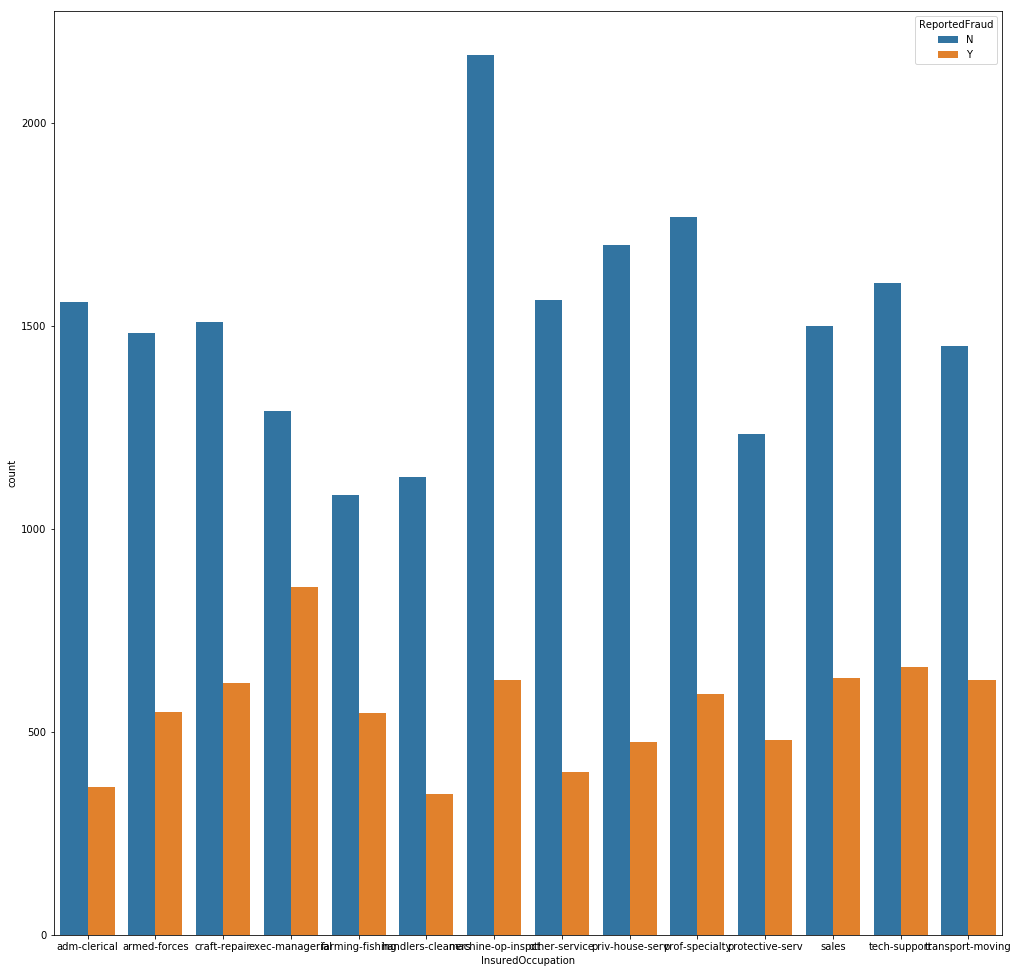

In [114]:
plt.subplots(figsize=(17,17))
sns.countplot(x="InsuredOccupation", hue=target, data=train_final_data)

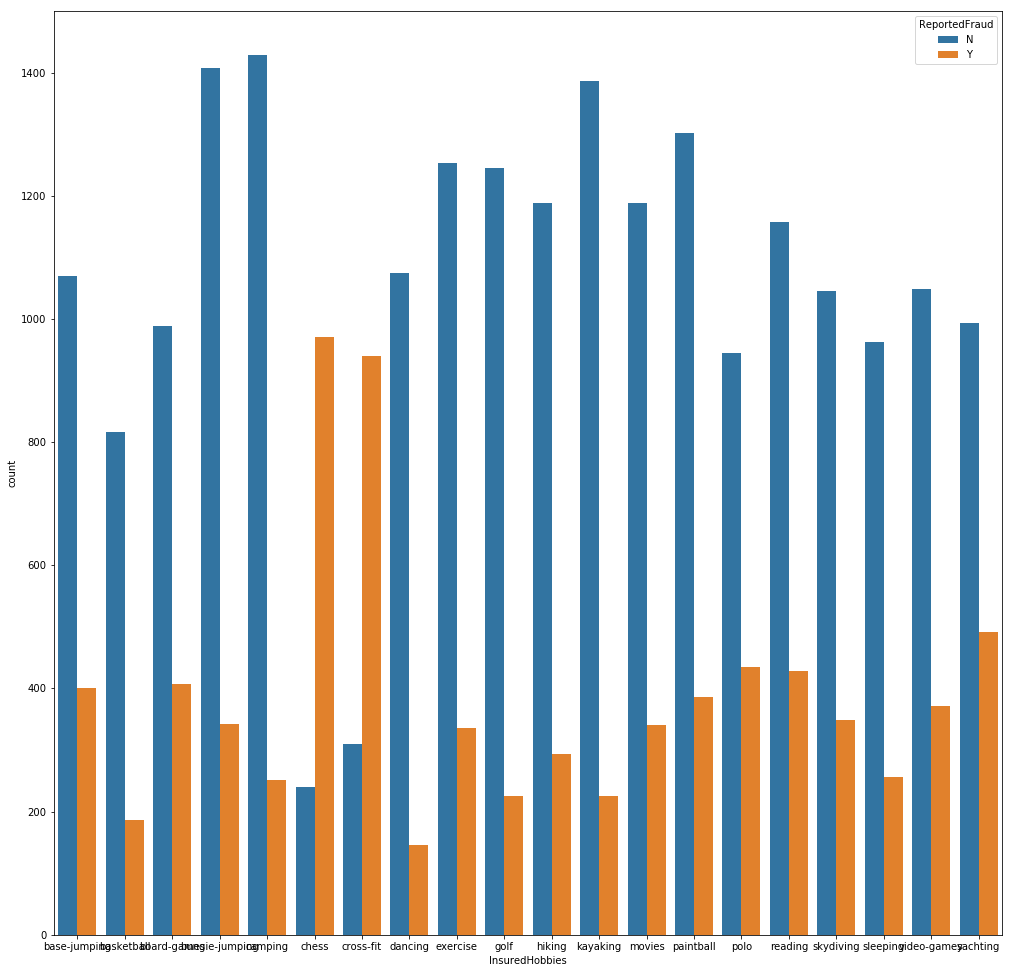

In [115]:
plt.subplots(figsize=(17,17))
sns.countplot(x="InsuredHobbies", hue=target, data=train_final_data)

# More Witnesses are creating the Fraud

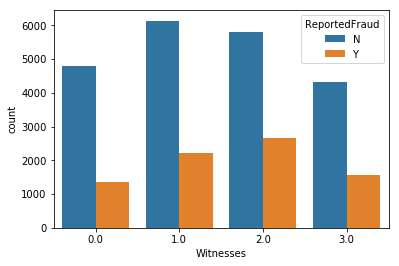

In [116]:
sns.countplot(x="Witnesses", hue=target, data=train_final_data)

# Code to Test the Anova

C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))
C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:2967: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / float(dfwn)
C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


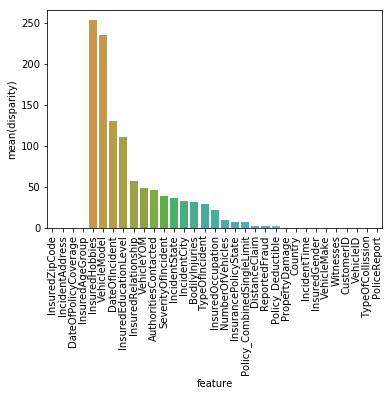

In [117]:
test_cat_variables = catergorical_variables + ['ReportedFraud']
def anova_one_way(frame,numerical_variable):
    anv = pd.DataFrame()
    anv['feature'] = test_cat_variables
    pvals = []
    for c in test_cat_variables:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls][numerical_variable].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')


a = anova_one_way(train_final_data,'InsuredAge')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

# Chisquare Function for Test of Independence for Categorical Variables

In [118]:

from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))


p_value = chisq_of_df_cols(final_data,'TypeOfCollission','TypeOfIncident')  
p_value

(210.11872332520346,
 1.3286346882412612e-42,
 6,
 array([[ 4851.30378262,  5780.13744887,  5263.55876851],
        [   19.22819366,    22.90963569,    20.86217065],
        [ 4740.51276198,  5648.1343099 ,  5143.35292812],
        [   14.95526174,    17.81860554,    16.22613272]]))

# Storing the Preprocessed files under train and Unseen Data

In [119]:

train_final_data.to_csv('data/preprocessed/final_train.csv',header=True,index=False)

test_final_data.to_csv('data/preprocessed/unseen.csv',header=True,index=False)

In [120]:
# Dropping the Variable after the Preprocessing Steps

In [121]:
# Removing the Columns


columns_drop = [
    
    # Unique values columns
    'CustomerID',
    'VehicleID',
    'InsurancePolicyNumber',
    'Country',
    
    
    # Created variables
    'IncidentState_Num',
    'InsurancePolicyState_Num',
    
    # Date Variables
    'DateOfPolicyCoverage',
    'DateOfIncident',

               
]




drop_columns(train_final_data,columns_drop)

drop_columns(test_final_data,columns_drop)




high_na_columns = ['PropertyDamage','PoliceReport']

drop_columns(train_final_data,high_na_columns)

drop_columns(test_final_data,high_na_columns)


C:\Users\AVINASH_BENDIGERI\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# H2O Part Starts from Here

In [122]:
target = "ReportedFraud"

preprocessed_csv_path = 'data/preprocessed/final_train.csv'

unseen_csv_path = 'data/preprocessed/unseen.csv'

prediction_folder = 'data/prediction/'

max_seconds = 300

seed = 12345

# Option specifies the scheme to use for cross-validation fold assignment.
# Values : "Auto", "Random" , "Modulo" , "Stratified"
fold_assignment="Modulo" 

nfolds = 10 # Cross Fold Validation

keep_cross_validation_predictions=True

# select the values for lambda_ to grid over
glm_hyper_params = {
                      'lambda' : list(np.arange(0,1,0.01)),
                      'alpha' : [0,0.25,0.5,0.75,1] 
                }


gbm_hyper_params = {
    
    'ntrees':list(np.arange(100,2000,100)),
    'max_depth':list(np.arange(1,20)),
    'min_rows':[1,5,10,20,50,100],
    'learn_rate':list(np.arange(0.001,0.01,0.001)),  
    'sample_rate':list(np.arange(0.3,1,0.05)),
    'col_sample_rate' :list(np.arange(0.3,1,0.05))

}

balance_classes = True # Is Applicable only if the Target Response Variable is imbalanced

                                 
search_criteria = {
  "strategy": "RandomDiscrete",
  "max_runtime_secs": max_seconds,
  "max_models": 500,
  "stopping_metric": "AUTO",
  "stopping_tolerance": 0.00001,
  "stopping_rounds": 5,
  "seed": 123456
}


# Import the preprocessed dataset

In [123]:

preprocessed_df = h2o.import_file(path=preprocessed_csv_path,header=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


# Variables for the Categorical and Numerical Variable

In [124]:
cat_variables = [

'VehicleModel',
'IncidentAddress',
'InsuredHobbies',
'InsuredZipCode',
'SeverityOfIncident',
'InsuredEducationLevel',
'InsuredOccupation',
'IncidentTime',
'VehicleMake',    

    
 # Commenting all the variables as these are not that significant      
 
#  'InsuredAgeGroup',
#  'TypeOfIncident',
#  'AuthoritiesContacted',
#  'InsuredGender',

#  'IncidentCity',
#  'Policy_CombinedSingleLimit',
#  'VehicleYOM',
#  'TypeOfCollission',
#  'Witnesses',
#  'NumberOfVehicles',
#  'BodilyInjuries',

#  'IncidentState',
#  'DistanceClaim',
#  'Policy_Deductible',
#  'InsuredAge',
#  'InsuredRelationship',
#  'InsurancePolicyState',
            
]

num_variables = [

'CapitalLoss',
    
 # Commenting all the variables as these are not that significant   
    
# 'AmountOfTotalClaim',
# 'InsuredAge',
# 'AmountOfInjuryClaim',
# 'AmountOfPropertyClaim',
# 'AmountOfVehicleDamage',
# 'CapitalGains',

# 'CustomerLoyaltyPeriod',
 
# 'PolicyAnnualPremium',
# 'UmbrellaLimit',
# 'RemainingDays',
# 'FinancialStatus'

]


# Transforming the Datatypes of the Variable

In [125]:
for var in cat_variables:
    preprocessed_df[var] = preprocessed_df[var].asfactor()
    
for var in num_variables:
    preprocessed_df[var] = preprocessed_df[var].asnumeric()
    
preprocessed_df[target] = preprocessed_df[target].asfactor()

# Creating the Predictors Vector

In [126]:
predictors = num_variables + cat_variables

predictors

['CapitalLoss',
 'VehicleModel',
 'IncidentAddress',
 'InsuredHobbies',
 'InsuredZipCode',
 'SeverityOfIncident',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'IncidentTime',
 'VehicleMake']

# Split the data into Train/Test/Validation with Train having 70% and test and validation 15% each

In [127]:

train,valid,test = preprocessed_df.split_frame(ratios=[.7,.15],seed=12345)

# Generate a GLM model using the training dataset

In [128]:

import time
ts = time.time()
ts = int(ts)


# Generate a GLM model using the training dataset
glm_classifier = H2OGeneralizedLinearEstimator(family="binomial", nfolds=nfolds,
                                               keep_cross_validation_predictions = True,
                                               balance_classes=balance_classes,
                                              standardize=True,
                                              seed=seed)



# glm_classifier.train(x = predictors, y = target, training_frame = train, validation_frame = valid)


# build grid search with previously made GLM and hyperparameters
glm_grid = H2OGridSearch(model = glm_classifier, 
                     hyper_params = glm_hyper_params,
                     search_criteria = search_criteria,grid_id = "glm_grid_1_"+str(ts))

# train using the grid
glm_grid.train(x = predictors, y = target, training_frame = train, validation_frame = valid)



glm_grid_table = glm_grid.get_grid(sort_by = 'auc', decreasing = True)
print(glm_grid_table)


# glm_classifier._model_json['output']['validation_metrics']


glm_final_model = glm_grid_table.models[0]



glm Grid Build progress: |████████████████████████████████████████████████| 100%
        alpha                 lambda                       model_ids  \
0       [1.0]                  [0.0]  glm_grid_1_1518201522_model_58   
1       [0.0]                 [0.01]  glm_grid_1_1518201522_model_30   
2       [0.0]                 [0.06]  glm_grid_1_1518201522_model_61   
3       [0.0]                 [0.09]  glm_grid_1_1518201522_model_48   
4       [0.0]                  [0.1]  glm_grid_1_1518201522_model_42   
5       [0.0]                 [0.11]  glm_grid_1_1518201522_model_25   
6       [0.0]                 [0.14]  glm_grid_1_1518201522_model_24   
7       [0.0]                  [0.2]  glm_grid_1_1518201522_model_60   
8       [0.0]                 [0.24]  glm_grid_1_1518201522_model_69   
9       [0.0]                 [0.26]  glm_grid_1_1518201522_model_75   
10      [0.0]                 [0.28]  glm_grid_1_1518201522_model_74   
11      [0.0]                 [0.39]  glm_grid_1_151820

# Displaying the ROC Curve for the Train Valid and Test Dataset

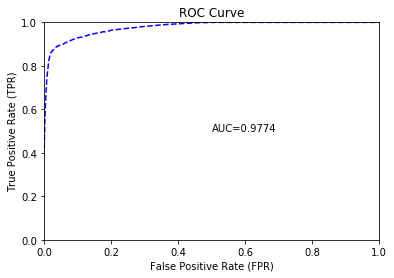

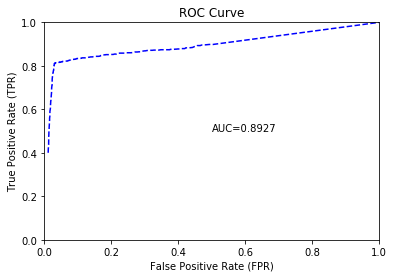

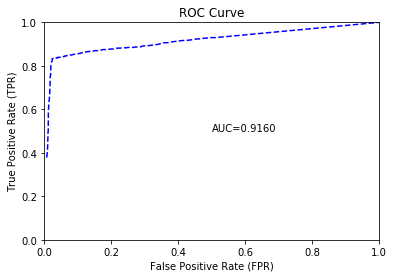

In [129]:
train_performance = glm_final_model.model_performance(train)
train_performance.plot()


valid_performance = glm_final_model.model_performance(valid)
valid_performance.plot()


test_performance = glm_final_model.model_performance(test)
test_performance.plot()

# Random Forest Algorithm

In [130]:

import time
ts = time.time()
ts = int(ts)



# Hyper Parameters
rf_hyper_params = {
    
    'ntrees':list(np.arange(100,2000,100)),
    'mtries':list(np.arange(1,len(predictors)-1,1)),
    'max_depth':list(np.arange(5,25,2))
}

                                


rf_classifier = H2ORandomForestEstimator(distribution="bernoulli", nfolds=nfolds,
                                 fold_assignment=fold_assignment,
                                 keep_cross_validation_predictions=keep_cross_validation_predictions,
                                 balance_classes=balance_classes,
                                 seed=seed)



# build grid search with previously made GLM and hyperparameters
rf_grid = H2OGridSearch(model = rf_classifier, 
                     hyper_params = rf_hyper_params,
                     search_criteria = search_criteria,grid_id = "rf_grid_1_"+str(ts))

# train using the grid
rf_grid.train(x = predictors, y = target, training_frame = train, validation_frame = valid)


rf_grid_table = rf_grid.get_grid(sort_by = 'auc', decreasing = True)
print(rf_grid_table)


rf_final_model = rf_grid_table.models[0]

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth mtries ntrees                     model_ids                 auc
0          17      7    288  rf_grid_1_1518201840_model_0  0.9121923007513344



# Displaying the ROC Curve for the Train Valid and Test Dataset

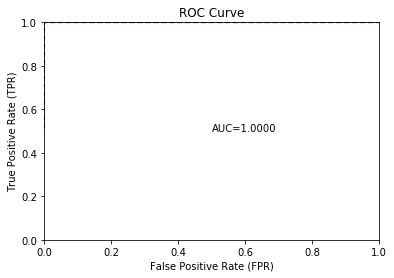

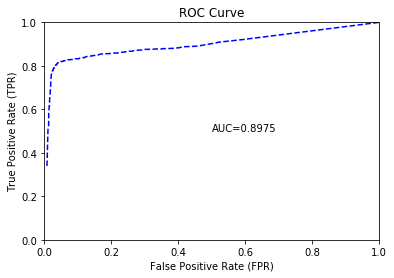

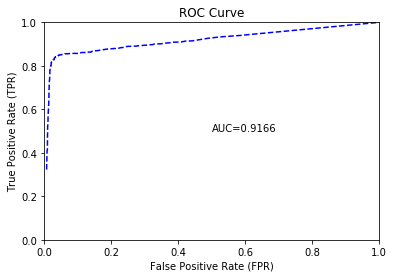

In [131]:
train_performance = rf_final_model.model_performance(train)
train_performance.plot()


valid_performance = rf_final_model.model_performance(valid)
valid_performance.plot()


test_performance = rf_final_model.model_performance(test)
test_performance.plot()

# Displaying the Variable Importance Graph

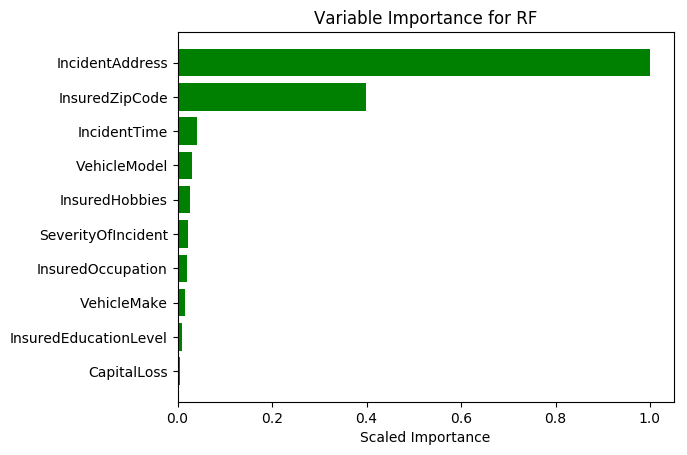

In [132]:

plt.rcdefaults()
fig, ax = plt.subplots()
variables = rf_final_model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = rf_final_model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance for RF')
plt.show()

# Gradient Boosting Algorithm


In [133]:
## Gradient Boosting Algorithm



import time
ts = time.time()
ts = int(ts)


gbm_classifier = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      nfolds=nfolds,
                                      fold_assignment=fold_assignment,
                                      keep_cross_validation_predictions=keep_cross_validation_predictions,
                                      balance_classes=balance_classes,
                                      seed=seed)

# build grid search with previously made GLM and hyperparameters
gbm_grid = H2OGridSearch(model = gbm_classifier, 
                     hyper_params = gbm_hyper_params,
                     search_criteria = search_criteria,grid_id = "gbm_grid_1_"+str(ts))

# train using the grid
gbm_grid.train(x = predictors, y = target, training_frame = train, validation_frame = valid)


gbm_grid_table = gbm_grid.get_grid(sort_by = 'auc', decreasing = True)

print(gbm_grid_table)

gbm_final_model = gbm_grid_table.models[0]

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
        col_sample_rate learn_rate max_depth min_rows ntrees  \
0    0.8499999999999999      0.005        13     10.0    159   

           sample_rate                      model_ids                auc  
0  0.44999999999999996  gbm_grid_1_1518202154_model_0  0.912561180285339  



# Displaying the ROC Curve for the Train Valid and Test Dataset

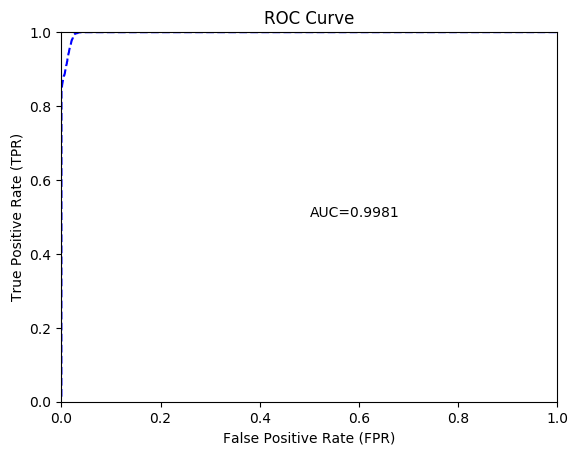

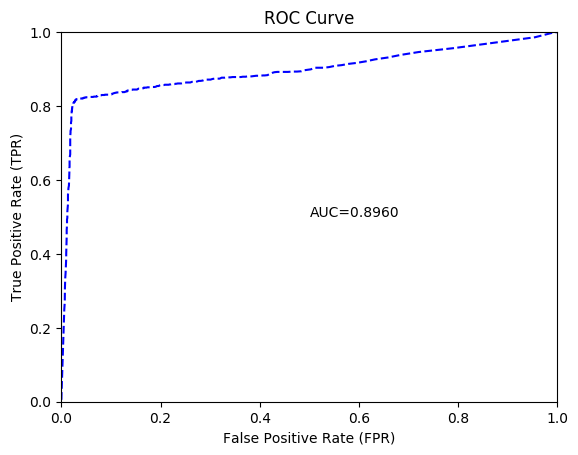

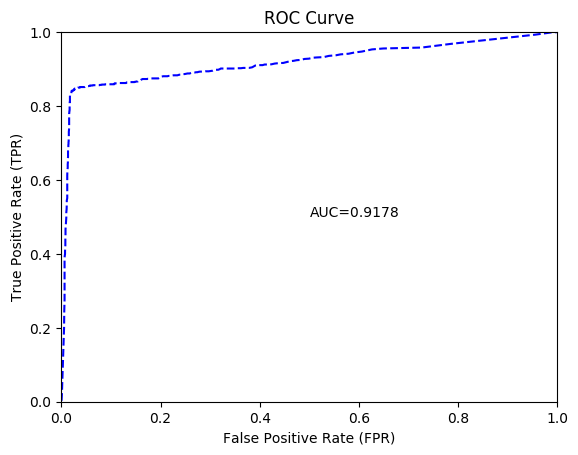

In [134]:
train_performance = gbm_final_model.model_performance(train)
train_performance.plot()


valid_performance = gbm_final_model.model_performance(valid)
valid_performance.plot()


test_performance = gbm_final_model.model_performance(test)
test_performance.plot()

# Stacked or Ensemble Method of GBM + RF Best Model

In [135]:


# Train a stacked ensemble using the GBM and GLM above



import time
ts = time.time()
ts = int(ts)


gbm_model = gbm_final_model

rf_model = rf_final_model



ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial_"+str(ts),
                                       base_models=[gbm_model, rf_model])



ensemble.train(x=predictors, y=target, training_frame=train,validation_frame=valid)


stackedensemble Model Build progress: |███████████████████████████████████| 100%


# Displaying the ROC Curve for the Train Valid and Test Dataset

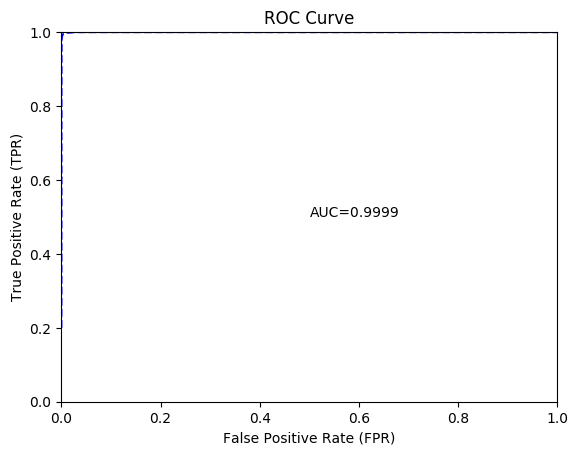

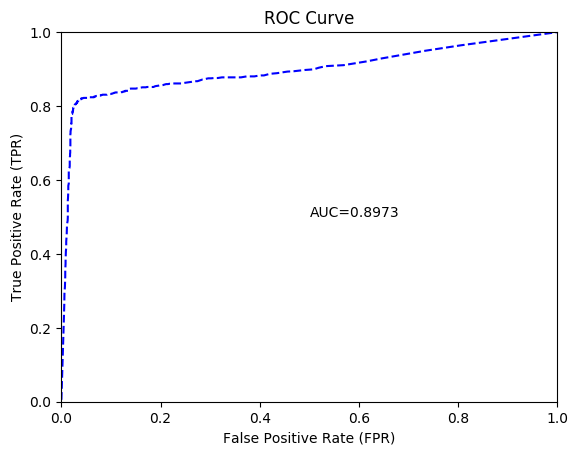

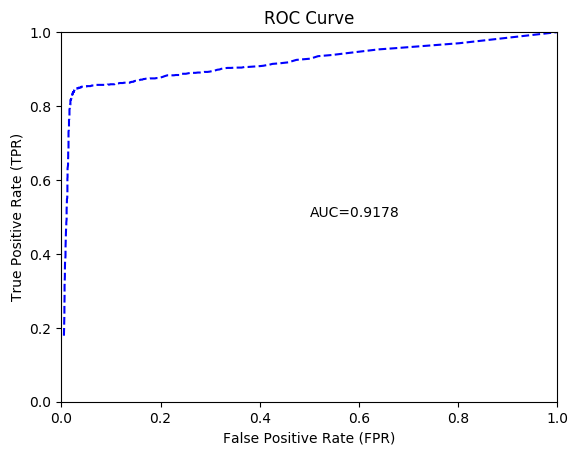

In [136]:
train_performance = ensemble.model_performance(train)
train_performance.plot()


valid_performance = ensemble.model_performance(valid)
valid_performance.plot()


test_performance = ensemble.model_performance(test)
test_performance.plot()

# Checking the Performance of the Ensemble Model with the Base Learner

In [137]:
# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

# Compare to base learner performance on the test set
perf_gbm_test = gbm_model.model_performance(test)
perf_rf_test = rf_model.model_performance(test)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))


Best Base-learner Test AUC:  0.91784686777655
Ensemble Test AUC:  0.9177670095388738


# Generate a random grid of models of GBM and stack them together

In [138]:

import time
ts = time.time()
ts = int(ts)


# Specify GBM hyperparameters for the grid
ensemble_hyper_params = {"learn_rate": [0.01, 0.03],
                "max_depth": [3, 4, 5, 6, 9],
                "sample_rate": [0.7, 0.8, 0.9, 1.0],
                "col_sample_rate": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                        "ntrees" : [30,40,50,60,70,80,90,100]
                         
                        
                        
                        }
ensemble_search_criteria = {"strategy": "RandomDiscrete", "max_models": 200, "seed": 12345,"max_runtime_secs": max_seconds}

# Train the grid
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(
                                                        seed=12345,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True
                                                        ),
                     hyper_params=gbm_hyper_params,
                     search_criteria=ensemble_search_criteria,
                     grid_id="gbm_grid_binomial_"+str(ts))
grid.train(x=predictors, y=target, training_frame=train,validation_frame=valid)

# Train a stacked ensemble using the GBM grid
ensemble_stack = H2OStackedEnsembleEstimator(model_id="my_ensemble_gbm_grid_binomial_"+str(ts),
                                       base_models=grid.model_ids)
ensemble_stack.train(x=predictors, y=target, training_frame=train,validation_frame=valid)

# Eval ensemble performance on the test data
perf_stack_test = ensemble_stack.model_performance(test)

# Compare to base learner performance on the test set
baselearner_best_auc_test = max([h2o.get_model(model).model_performance(test_data=test).auc() for model in grid.model_ids])
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble GBM Test AUC:  {0}".format(stack_auc_test))

# Generate predictions on a test set (if neccessary)
pred = ensemble_stack.predict(test)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
Best Base-learner Test AUC:  0.9202241451979555
Ensemble GBM Test AUC:  0.9165396375897641
stackedensemble prediction progress: |████████████████████████████████████| 100%


# Displaying the ROC Curve for the Train Valid and Test Dataset


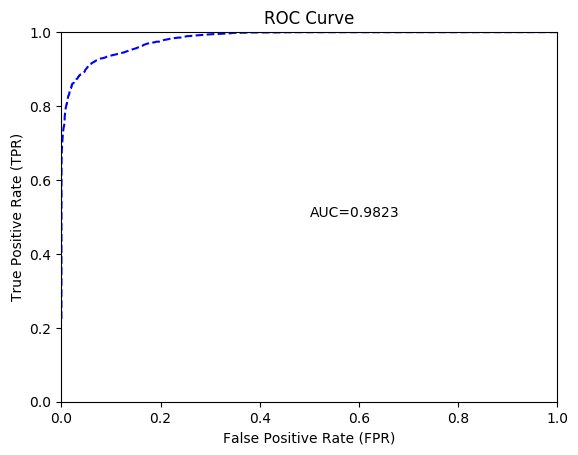

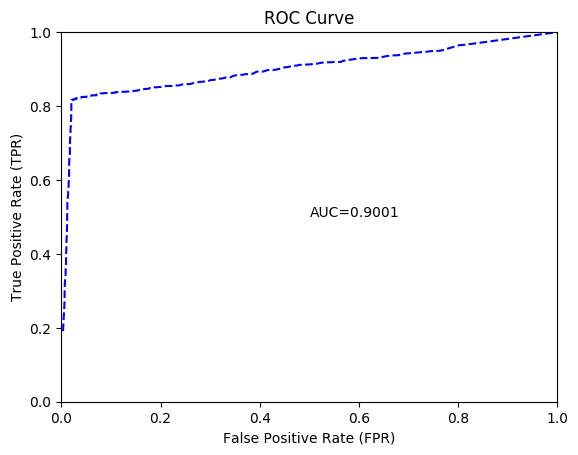

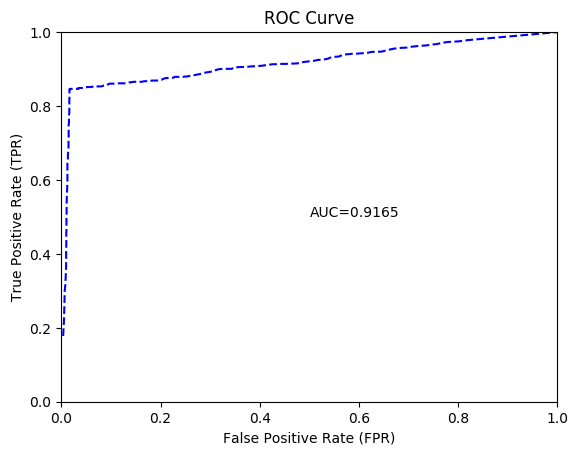

In [139]:
train_performance = ensemble_stack.model_performance(train)
train_performance.plot()


valid_performance = ensemble_stack.model_performance(valid)
valid_performance.plot()


test_performance = ensemble_stack.model_performance(test)
test_performance.plot()

# Generate a random grid of models of Random Forest and stack them together

In [140]:

import time
ts = time.time()
ts = int(ts)

# Specify RF hyperparameters for the grid

ensemble_search_criteria = {"strategy": "RandomDiscrete", "max_models": 200, "seed": 12345,"max_runtime_secs": max_seconds}


rf_classifier = H2ORandomForestEstimator(distribution="bernoulli", nfolds=nfolds,
                                 fold_assignment=fold_assignment,
                                 keep_cross_validation_predictions=keep_cross_validation_predictions,
                                 balance_classes=balance_classes,
                                 seed=seed)



# Train the grid
grid = H2OGridSearch(model=H2ORandomForestEstimator(    seed=seed,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=rf_hyper_params,
                     search_criteria=ensemble_search_criteria,
                     grid_id="rf_grid_binomial_"+str(ts))
grid.train(x=predictors, y=target, training_frame=train,validation_frame=valid)

# Train a stacked ensemble using the GBM grid
ensemble_rf_stack = H2OStackedEnsembleEstimator(model_id="my_ensemble_rf_grid_binomial_"+str(ts),
                                       base_models=grid.model_ids)
ensemble_rf_stack.train(x=predictors, y=target, training_frame=train,validation_frame=valid)

# Eval ensemble performance on the test data
perf_rf_stack_test = ensemble_rf_stack.model_performance(test)

# Compare to base learner performance on the test set
baselearner_best_auc_test = max([h2o.get_model(model).model_performance(test_data=test).auc() for model in grid.model_ids])
stack_auc_test = perf_rf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble RF Test AUC:  {0}".format(stack_auc_test))

# Generate predictions on a test set (if neccessary)
pred = ensemble_rf_stack.predict(test)

drf Grid Build progress: |████████████████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
Best Base-learner Test AUC:  0.9187284974054709
Ensemble RF Test AUC:  0.9185948245483957
stackedensemble prediction progress: |████████████████████████████████████| 100%


# Displaying the ROC Curve for the Train Valid and Test Dataset

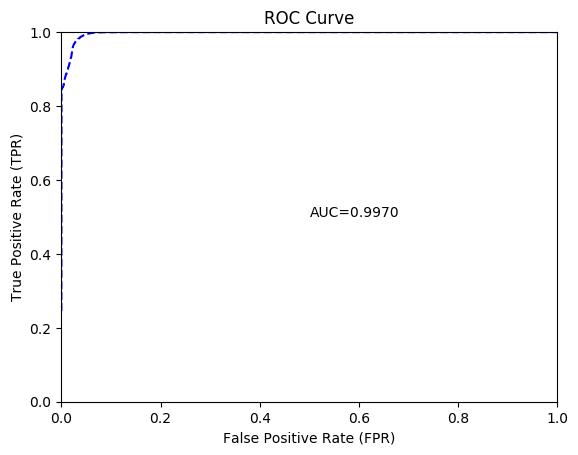

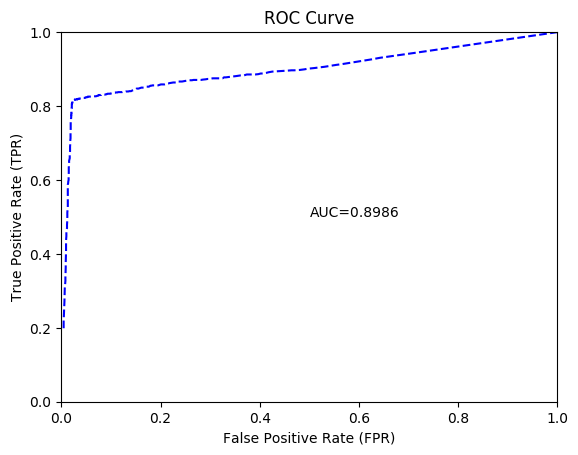

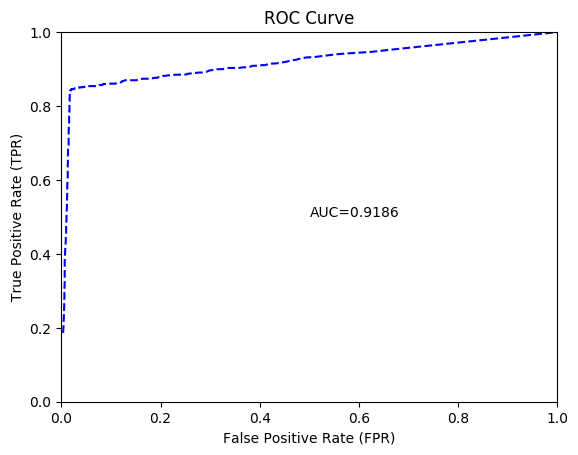

In [141]:
train_performance = ensemble_rf_stack.model_performance(train)
train_performance.plot()


valid_performance = ensemble_rf_stack.model_performance(valid)
valid_performance.plot()


test_performance = ensemble_rf_stack.model_performance(test)
test_performance.plot()

# Building using the AutoML Feature in H2O

In [142]:
from h2o.automl import H2OAutoML


# Run AutoML for 30 seconds
aml = H2OAutoML(nfolds=10,max_runtime_secs = max_seconds)
aml.train(x = predictors, y = target,
          training_frame = train,
          leaderboard_frame = valid)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb


AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
StackedEnsemble_BestOfFamily_0_AutoML_20180210_003547,0.906911,0.244519
DRF_0_AutoML_20180210_003547,0.905031,1.13693
StackedEnsemble_AllModels_0_AutoML_20180210_003547,0.904874,0.244317
GBM_grid_0_AutoML_20180210_003547_model_1,0.897356,0.305035
GBM_grid_0_AutoML_20180210_003547_model_0,0.897058,0.293662
GBM_grid_0_AutoML_20180210_003547_model_3,0.895453,0.313214
GBM_grid_0_AutoML_20180210_003547_model_4,0.894801,0.266624
GBM_grid_0_AutoML_20180210_003547_model_2,0.89431,0.309814
GLM_grid_0_AutoML_20180210_003547_model_0,0.88388,0.355009
XRT_0_AutoML_20180210_003547,0.87614,0.378585


# Reading the Unseen Test Data into the Dataframe

In [143]:
unseen_df = h2o.import_file(path=unseen_csv_path,header=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


# Converting the Datatype of the Variable

In [144]:
for var in cat_variables:
    unseen_df[var] = unseen_df[var].asfactor()
    
for var in num_variables:
    unseen_df[var] = unseen_df[var].asnumeric()

# Converting to Pandas Dataframe

In [145]:
unseen_pandas_df = unseen_df.as_data_frame()
unseen_df = unseen_df.drop('CustomerID')

# Predicting the Values from all the Models built so far

In [146]:
# Predict using the GLM model and the testing dataset
# predict_glm = best_logistic_model.predict(unseen_df)

predict_glm = glm_final_model.predict(unseen_df)


# Predict using the RF model and the testing dataset
predict_rf = rf_final_model.predict(unseen_df)


# Predict using the GBM model and the testing dataset
predict_gbm = gbm_final_model.predict(unseen_df)


# Predict using the Ensemble of GBM + RF model and the testing dataset
predict_ensemble = ensemble.predict(unseen_df)

# Predict using the Ensemble GBM

predict_ensemble_stack = ensemble_stack.predict(unseen_df)


# Predict using the Ensemble RF
predict_ensemble_rf_stack = ensemble_rf_stack.predict(unseen_df)

# Predict using the Auto ML
predict_auto_ml = aml.leader.predict(unseen_df)


glm prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


# Creating the Dataframes before to write into Model

In [147]:
prediction_glm_df = predict_glm.as_data_frame()
type(prediction_glm_df)

prediction_glm_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_glm_df[target] = prediction_glm_df['predict']

###############################################

prediction_gbm_df = predict_gbm.as_data_frame()
type(prediction_gbm_df)

prediction_gbm_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_gbm_df[target] = prediction_gbm_df['predict']

###############################################


prediction_rf_df = predict_rf.as_data_frame()
type(prediction_rf_df)

prediction_rf_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_rf_df[target] = prediction_rf_df['predict']

###############################################


prediction_ensemble_df = predict_ensemble.as_data_frame()
type(prediction_glm_df)

prediction_ensemble_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_ensemble_df[target] = prediction_ensemble_df['predict']


###############################################


prediction_automl_df = predict_auto_ml.as_data_frame()
type(prediction_automl_df)

prediction_automl_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_automl_df[target] = prediction_automl_df['predict']


#########################################################

prediction_ensemble_stack_df = predict_ensemble_stack.as_data_frame()

prediction_ensemble_stack_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_ensemble_stack_df[target] = prediction_ensemble_stack_df['predict']

#################################################################


prediction_ensemble_rf_stack_df = predict_ensemble_rf_stack.as_data_frame()

prediction_ensemble_rf_stack_df['CustomerID'] = unseen_pandas_df['CustomerID']
prediction_ensemble_rf_stack_df[target] = prediction_ensemble_rf_stack_df['predict']


In [148]:
# Creating a time stamp for the file name

import time
ts = time.time()
ts = int(ts)

# Building the CSV Files into the respective folders


## GLM results under /prediction/glm

## RF results under /prediction/rf

## GBM results under /prediction/gbm

## GBM_RF results under /prediction/ensemble

## GBM stack results under /prediction/gbm_stack

## RF Stack stack results under /prediction/rf_stack

## AutoML results under /prediction/automl


In [149]:
# Exporting the results of GLM model on the Unseen Dataset

prediction_glm_df[['CustomerID',target]].to_csv('data/prediction/glm/prediction_glm_'+str(ts)+'.csv',header=True,index=False)



# Exporting the results of GBM model on the Unseen Dataset

prediction_gbm_df[['CustomerID',target]].to_csv('data/prediction/gbm/prediction_gbm_'+str(ts)+'.csv',header=True,index=False)




# Exporting the results of RF model on the Unseen Dataset

prediction_rf_df[['CustomerID',target]].to_csv('data/prediction/rf/prediction_rf_'+str(ts)+'.csv',header=True,index=False)




# Exporting the results of GBM + RF Ensemble model on the Unseen Dataset

prediction_ensemble_df[['CustomerID',target]].to_csv('data/prediction/ensemble/prediction_ensemble_'+str(ts)+'.csv',header=True,index=False)


# Exporting the results of AutoML model on the Unseen Dataset

prediction_automl_df[['CustomerID',target]].to_csv('data/prediction/automl/prediction_automl_'+str(ts)+'.csv',header=True,index=False)



# Exporting the results of Ensemble_GBM model on the Unseen Dataset

prediction_ensemble_stack_df[['CustomerID',target]].to_csv('data/prediction/gbm_stack/prediction_gbm_stack_'+str(ts)+'.csv',header=True,index=False)


# Exporting the results of Ensemble_RF model on the Unseen Dataset

prediction_ensemble_rf_stack_df[['CustomerID',target]].to_csv('data/prediction/rf_stack/prediction_rf_stack_'+str(ts)+'.csv',header=True,index=False)



